In [8]:
# All the Import Statements that we will need:

import os
import nltk

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.probability import FreqDist
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
train_data = pd.read_csv(r'data_set\train.csv')
test_data = pd.read_csv(r'data_set\test.csv')

In [4]:
train_data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
3,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1
4,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1


In [5]:
test_data.head()

,ID,COMMENT_ID,AUTHOR,DATE,CONTENT
0,0,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...
1,1,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com
2,2,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a..."
3,3,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,2013-11-28T12:33:27,i turned it on mute as soon is i came on i jus...
4,4,z13ttt1jcraqexk2o234ghbgzxymz1zzi04,Cony,2013-11-28T16:01:47,You should check my channel for Funny VIDEOS!!﻿


In [7]:
# '1' Corresponds to 'advertisement'
# '0' Corresponds to 'commnet'
train_data['CLASS'].value_counts()

1    586
0    571
Name: CLASS, dtype: int64

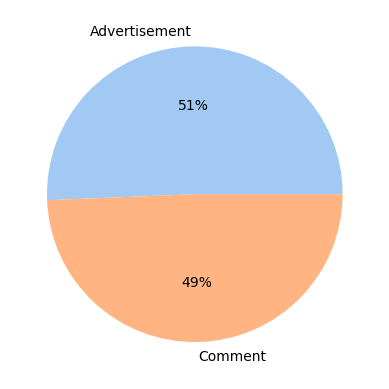

In [9]:
# Visualizing Data
label = ['Advertisement','Comment']
colors = sns.color_palette('pastel')[0:5]
plt.pie(train_data['CLASS'].value_counts(),labels = label , colors = colors, autopct='%.0f%%')
plt.show()

In [10]:
# We do not want any ordering of samples to influence the relationship between Comment and Class.

train_comment = np.array(train_data['CONTENT'])
train_label = np.array(train_data['CLASS'])

seed = 123
np.random.seed(seed)
np.random.shuffle(train_comment)
np.random.seed(seed)
np.random.shuffle(train_label)

In [11]:
print(len(train_comment))
print(len(train_label))

1157
1157


In [12]:
#Median number of words in comments column of the corpus
word_count = [len(comment.split()) for comment in train_comment]
median = np.median(word_count)
print(median)

8.0


In [13]:
word_list = []
for comment in train_comment:
    for word in comment.split():
        word_list.append(word)

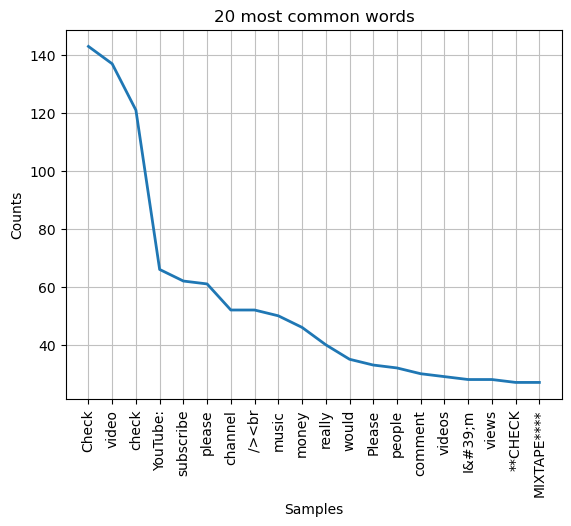

<AxesSubplot:title={'center':'20 most common words'}, xlabel='Samples', ylabel='Counts'>

In [14]:
stop_words = set(stopwords.words('english'))
filtered_word_list = [w for w in word_list if (not w.lower() in stop_words and len(w) >= 5)]         
fdist_filtered = FreqDist(filtered_word_list)
fdist_filtered.plot(20,title='20 most common words')

In [15]:
data_frame = pd.DataFrame(list(zip(train_comment, train_label)), columns=['comment', 'label'])

In [16]:
data_frame.head()

,comment,label
0,I'm not a big fan of the song but this video i...,0
1,Wow...5 years<br />﻿,0
2,i hate this music. fucking singer and every ko...,0
3,CHECK OUT THIS DOPE CHANNEL! phenomenallyri...,1
4,super﻿,0


In [17]:
data_frame.tail()

,comment,label
1152,The most watched video on YouTube is Psy’s “Ga...,0
1153,Check out this video on YouTube:<br />&quot;Th...,1
1154,"The funny thing is, 1,700,000,000 of the views...",0
1155,New way to make money easily and spending 20 m...,1
1156,Check out these Irish guys cover of Avicii&#...,1


In [18]:
# Since train and test are separate before vectorizing we have to combine the 'CONTENT' column of the two sets.

df1 = data_frame['comment']
df2 = test_data['CONTENT']

vectorize_input = df1.append(df2, ignore_index=True)

In [22]:
vectorize_input.shape

(1956,)

In [25]:
# Vectorization using Tfidf encoding

sw = stopwords.words('english')
vectorizer = TfidfVectorizer(stop_words=sw,lowercase=True)
vectorize_output = vectorizer.fit_transform(vectorize_input).toarray()
print(vectorize_output.shape)

(1956, 4328)


In [27]:
X_train = vectorize_output[:1157]
Y_train = data_frame.label.values
X_test = vectorize_output[1157:]

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(1157, 4328)
(1157,)
(799, 4328)


In [28]:
# Logistic Regression Model

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, Y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [35]:
Y_pred = model.predict(X_test)

In [43]:
pred_data = pd.DataFrame(list(zip(df2, Y_pred)), columns=['comment', 'label'])

In [44]:
pred_data.head()

,comment,label
0,Hey guys check out my new channel and our firs...,1
1,just for test I have to say murdev.com,1
2,"Hey, check out my new website!! This site is a...",1
3,i turned it on mute as soon is i came on i jus...,0
4,You should check my channel for Funny VIDEOS!!﻿,1


In [46]:
pred_data.tail()

,comment,label
794,Hey Music Fans I really appreciate all of you ...,1
795,she is sooooo beautiful!,0
796,well done shakira,0
797,I love this song because we sing it at Camp al...,0
798,Shakira is the best dancer,0


In [49]:
pred_data.to_excel("output.xlsx")

In [75]:
csv_op = pred_data
csv_op = csv_op.rename(columns = {'label': 'CLASS'})
csv_op.insert(0, 'ID', range(0,len(csv_op)))

In [76]:
csv_op.head()

,ID,comment,CLASS
0,0,Hey guys check out my new channel and our firs...,1
1,1,just for test I have to say murdev.com,1
2,2,"Hey, check out my new website!! This site is a...",1
3,3,i turned it on mute as soon is i came on i jus...,0
4,4,You should check my channel for Funny VIDEOS!!﻿,1


In [78]:
header = ['ID', 'CLASS']
csv_op.to_csv("output.csv", columns=header, index=False)